In [1]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [2]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [3]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [4]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [5]:
scaler = StandardScaler().fit(original_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

## Linear kernel

In [6]:
model = SVC(kernel='linear', shrinking=False)
cross_val_score(model, original_X, original_y).mean()

0.7878601468834348

## Polynomial kernel

In [7]:
# 5-fold split (stratified)
degree = []
scores = []
for i in range(1, 5):
    model = SVC(kernel='poly', shrinking=False, degree=i)
    score = cross_val_score(model, original_X, original_y)
    scores.append(score.mean())
    degree.append(i)

result = pd.DataFrame(zip(degree, scores), columns=['degree', 'accuracy (mean)'])
px.line(result, x='degree', y='accuracy (mean)')

In [8]:
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# Degree of the polynomial kernel function (‘poly’). default 3
model = SVC(kernel='poly', shrinking=False)
cross_val_score(model, original_X, original_y).mean()

0.8159186491745652

## Classification

In [9]:
model = SVC(kernel='poly', shrinking=False)
model = model.fit(train_X, train_y)

In [10]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.8330658105939005
Test score
0.8246268656716418


In [11]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 348, TP: 171, FN: 68, FP: 36
Test
TN: 148, TP: 73, FN: 30, FP: 17


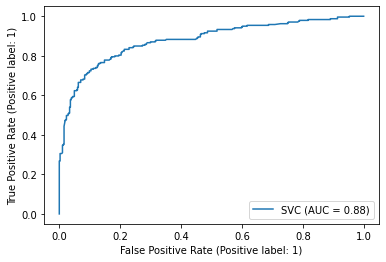

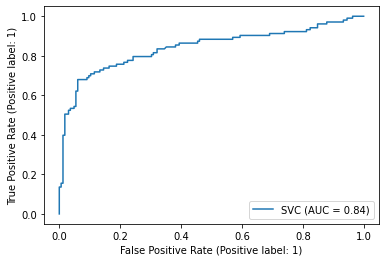

In [12]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)